In [1]:
import time
print time.ctime()

Tue May 31 09:51:44 2016


<sub>Bei diesem IPython-Notebook handelt es sich um eine Beispiel-Rechnung als Ergänzung zur Dissertationsschrift von C. Knoll. Allgemeine Hinweise zu den Beispielen sind in der [readme.md-Datei des entsprechenden Repositoriums](https://github.com/cknoll/beispiele/blob/master/readme.md) zu finden.</sub>

---


**Betrachtetes System:** Ebenes einrädriges Fahrzeug unter dem Einfluss der Schwerkraft.

<img src="files/images/unicycle.png">

**Systemanalyse**
* Aufstellen der Bewegungsgleichungen
* Flachheitsanalyse
    * Aufstellen des Tangentialsystems
    * Angabe einer unimodularen Ergänzung der Systemmatrix (inkl. Unimodularitätsnachweis)
    * Untersuchung der notwendigen Integrabilitätsbedingung
      * Bestimmung der Anzahl der Koeffizienten in den Differentialformen $\Xi_{i, k}$
      * Auswertung von $\Xi_{i,k}$ bis für $k=0,1,2$

[//]: # (custom_config_start)
$$
\newcommand{\d}{\mathrm{d}}
\newcommand{\col}{\mathrm{col}}
\newcommand{\bs}{\boldsymbol}
\newcommand{\Ddt}{\left(\tfrac{d}{dt}\right)}
\newcommand{\ddt}{\tfrac{d}{dt}}
\renewcommand{\tt}{\bs \theta}
$$
[//]: # (custom_config_end)

In [2]:
%load_ext displaytools

import sympy as sp
from sympy import sin, cos, pi, Matrix
from sympy.interactive import printing

import pycartan as pc # perspektivisch: pycartan
import symbtools as st
import symbtools.noncommutativetools as nc
import symbtools.modeltools as mt
import pickle

printing.init_printing()

In [3]:
np, nq = 1, 2
n = np + nq
ttheta = st.symb_vector("p1, q1, q2") ##:T
tthetad = st.time_deriv(ttheta, ttheta) ##:T
tthetadd = st.time_deriv(ttheta, ttheta, order=2) ##:T

st.make_global(ttheta, tthetad, tthetadd)

---


---


---


In [4]:
params = sp.symbols('l0, l1, s1, s2, J0, J1, J2, m0, m1, m2, g')
st.make_global(params)

tau1, tau2 = ttau = sp.symbols("tau1:3")

In [5]:
# Geometrie: (Einheitsvektoren)
ex = Matrix([1,0])
ey = Matrix([0,1])

M0 = Matrix([-l0*p1, l0]) # Mittelpunkt des Rades


S1 = M0 + mt.Rz(p1+q1)*ey*s1
S2 = M0 + mt.Rz(p1+q1)*ey*l1 + mt.Rz(p1+q1+q2)*ey*s2

M0d = st.time_deriv(M0, ttheta)
S1d = st.time_deriv(S1, ttheta)
S2d = st.time_deriv(S2, ttheta)

In [6]:
# Energie
T_rot = ( J0*pdot1**2 + J1*(pdot1+qdot1)**2 + J2*(pdot1+ qdot1+qdot2)**2 )/2
T_trans = ( m0*M0d.T*M0d  +  m1*S1d.T*S1d  +  m2*S2d.T*S2d )/2

T = T_rot + T_trans[0]

V = m1*g*S1[1] + m2*g*S2[1] 

In [7]:
mod = mt.generate_symbolic_model(T, V, ttheta, [0, tau1, tau2])

In [8]:
# Die ersten np-Zeilen entsprechen der eingangsfreien Systemgleichung

eq = mod.eqns[:np, :]

Die unimodulare Ergänzung wird aus [Franke2014] übernommen. Dort sind die Bewegungsgleichungen in absoluten Koordinaten $\varphi_0, \varphi_1, \varphi_2$ formuliert.
Zusammenhang: $\varphi_0 := p_1$, $\varphi_1 := p_1 + q_1$ und $\varphi_2 := p_1 + q_1 + q_2$


$\bs \theta = \boldsymbol T_a \boldsymbol \varphi.$



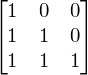

---


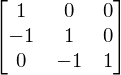

---


In [9]:
# Transformationsmatrix
Ta = sp.Matrix([[1, 0, 0], [1, 1, 0], [1, 1, 1]]) ##
Tainv = Ta.inv() ##

In [10]:
phi0, phi1, phi2 = pphi = st.symb_vector('varphi0, varphi1, varphi2')
pphi ##:T
pphidot = st.time_deriv(pphi, pphi) ##:T

# höhere Ableitungen (werden später noch gebraucht)
pphiddot = st.time_deriv(pphidot, pphi)
pphidddot = st.time_deriv(pphiddot, pphi)

___


---


In [11]:
FF = eq.subs(zip(ttheta, Tainv*pphi) + zip(tthetad, Tainv*pphidot) + zip(tthetadd, Tainv*pphiddot))
FF.simplify()

In [12]:
printing.init_printing(0)

P0 = FF.jacobian(pphi) ##
P1 = FF.jacobian(pphidot) ##
P2 = FF.jacobian(pphiddot) ##

printing.init_printing(1)

Matrix([[0, -g*l1*m2*cos(varphi1) - g*m1*s1*cos(varphi1) - l0*l1*m2*varphiddot0*sin(varphi1) - l0*l1*m2*varphiddot1*sin(varphi1) - l0*l1*m2*varphidot1**2*cos(varphi1) - l0*m1*s1*varphiddot0*sin(varphi1) - l0*m1*s1*varphiddot1*sin(varphi1) - l0*m1*s1*varphidot1**2*cos(varphi1) - l1*m2*s2*varphiddot1*sin(varphi1 - varphi2) - l1*m2*s2*varphiddot2*sin(varphi1 - varphi2) - l1*m2*s2*varphidot1**2*cos(varphi1 - varphi2) + l1*m2*s2*varphidot2**2*cos(varphi1 - varphi2), -g*m2*s2*cos(varphi2) - l0*m2*s2*varphiddot0*sin(varphi2) - l0*m2*s2*varphiddot2*sin(varphi2) - l0*m2*s2*varphidot2**2*cos(varphi2) + l1*m2*s2*varphiddot1*sin(varphi1 - varphi2) + l1*m2*s2*varphiddot2*sin(varphi1 - varphi2) + l1*m2*s2*varphidot1**2*cos(varphi1 - varphi2) - l1*m2*s2*varphidot2**2*cos(varphi1 - varphi2)]])

---


Matrix([[0, -2*l0*l1*m2*varphidot1*sin(varphi1) - 2*l0*m1*s1*varphidot1*sin(varphi1) - 2*l1*m2*s2*varphidot1*sin(varphi1 - varphi2), -2*l0*m2*s2*varphidot2*sin(varphi2) + 2*l1*m2*s2*varphidot2*sin(varphi1 - varphi2)]])

---


Matrix([[J0 + l0**2*m0 + l0**2*m1 + l0**2*m2 + l0*l1*m2*cos(varphi1) + l0*m1*s1*cos(varphi1) + l0*m2*s2*cos(varphi2), J1 + l0*l1*m2*cos(varphi1) + l0*m1*s1*cos(varphi1) + l1**2*m2 + l1*m2*s2*cos(varphi1 - varphi2) + m1*s1**2, J2 + l0*m2*s2*cos(varphi2) + l1*m2*s2*cos(varphi1 - varphi2) + m2*s2**2]])

---


---
Nun werden für die entsprechenden Einträge der Systemmatrix $P(\tfrac{d}{dt})$ Abkürzungen eingeführt.

In [13]:
a0, a1, a2, b0, b1, b2, c0, c1, c2 = abc = sp.symbols("a0, a1, a2, b0, b1, b2, c0, c1, c2", commutative=False)
s = sp.Symbol('s', commutative=False)

P0s = sp.Matrix([0, b0, c0]).T ##:
P1s = sp.Matrix([0, b1, c1]).T ##:
P2s = sp.Matrix([a2, b2, c2]).T ##:



---


---


---


In [14]:
# Datenstruktur für die Rücksubstitution der Platzhalter-Symbole (a,b,c)
replm_abc = sp.Matrix(zip(P0s, P0) + zip(P1s, P1) + zip(P2s, P2))

# ... und deren Ableitungen
replm_abc_dot = st.time_deriv(replm_abc, abc + tuple(pphi))

In [15]:
replm_abc_dot[:, 0].T

In [16]:
# Ableitungssymbole in den Namensraum einfügen
st.make_global(replm_abc_dot[:, 0])

# alle Substitutionen in einer Liste vereinen
replm = replm_abc.tolist() + replm_abc_dot.tolist()

Unimodulare Erweiterung entsprechend [Franke2014, S70] ) festlegen:

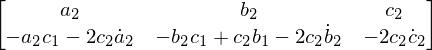

---


In [17]:
Q1 = sp.Matrix([[ a2, b2, c2]]) # entspricht P2s
Q2 = sp.Matrix([-2*c2*adot2 - a2*c1, c2*b1 - c2*2*bdot2 - b2*c1, -2*c2*cdot2]).T
Q = st.row_stack(Q1, Q2) ##

Prüfung der Unimodularität der Gesamtmatrix
$\left(\begin{smallmatrix}
\bs P_{\bs F}\\
\bs Q
\end{smallmatrix} \right)$:

---


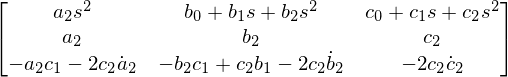

---


In [18]:
PF = P0s + P1s*s + P2s*s**2 ##:

PQ = st.row_stack(PF, Q) ##:

In [19]:
%time PQinv = nc.unimod_inv(PQ, s, time_dep_symbs=abc)

CPU times: user 2min 14s, sys: 36 ms, total: 2min 14s
Wall time: 2min 14s


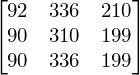

In [20]:
# Umfang der Ausdrücke (count_ops)
PQinv.co

In [21]:
# Nachweis, dass die berechnete Inverse tatsächlich eine Inverse ist.

product = nc.nc_mul(PQinv, PQ)
%time res = nc.right_shift_all(product, s, func_symbols=abc)


CPU times: user 13.3 s, sys: 24 ms, total: 13.3 s
Wall time: 13.3 s


CPU times: user 34.8 s, sys: 208 ms, total: 35 s
Wall time: 34.8 s


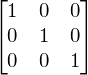

In [22]:
%time res2 = nc.commutative_simplification(res, s)
res2 

In [23]:
# Basis-Systemgrößen

ppx = st.row_stack(pphi, pphidot, pphiddot, pphidddot)

# Koeffizienten-Listen bezüglich aller Basis-Systemgrößen für die 1-Formen
Q1_ = st.col_stack(Q1, sp.zeros(1, n*3)).subs(replm)
Q2_ = st.col_stack(Q2, sp.zeros(1, n*3)).subs(replm)
P_ = st.col_stack(P0, P1, P2, sp.zeros(1, n) ).subs(replm)

# Erstellung der 1-Formen
w1 = pc.DifferentialForm(1, ppx, coeff=Q1_) ##:
w2 = pc.DifferentialForm(1, ppx, coeff=Q2_) ##:
dF = pc.DifferentialForm(1, ppx, coeff=P_) ##:

w1 := (J0 + l0**2*m0 + l0**2*m1 + l0**2*m2 + l0*l1*m2*cos(varphi1) + l0*m1*s1*cos(varphi1) + l0*m2*s2*cos(varphi2))dvarphi0  +  (J1 + l0*l1*m2*cos(varphi1) + l0*m1*s1*cos(varphi1) + l1**2*m2 + l1*m2*s2*cos(varphi1 - varphi2) + m1*s1**2)dvarphi1  +  (J2 + l0*m2*s2*cos(varphi2) + l1*m2*s2*cos(varphi1 - varphi2) + m2*s2**2)dvarphi2

---


w2 := (-(-2*l0*m2*s2*varphidot2*sin(varphi2) + 2*l1*m2*s2*varphidot2*sin(varphi1 - varphi2))*(J0 + l0**2*m0 + l0**2*m1 + l0**2*m2 + l0*l1*m2*cos(varphi1) + l0*m1*s1*cos(varphi1) + l0*m2*s2*cos(varphi2)) - 2*(-l0*l1*m2*varphidot1*sin(varphi1) - l0*m1*s1*varphidot1*sin(varphi1) - l0*m2*s2*varphidot2*sin(varphi2))*(J2 + l0*m2*s2*cos(varphi2) + l1*m2*s2*cos(varphi1 - varphi2) + m2*s2**2))dvarphi0  +  (-(-2*l0*m2*s2*varphidot2*sin(varphi2) + 2*l1*m2*s2*varphidot2*sin(varphi1 - varphi2))*(J1 + l0*l1*m2*cos(varphi1) + l0*m1*s1*cos(varphi1) + l1**2*m2 + l1*m2*s2*cos(varphi1 - varphi2) + m1*s1**2) + (-2*l0*l1*m2*varphidot1*sin(varphi1) - 2*l0*m1*s1*varphidot1*sin(varphi1) - 2*l1*m2*s2*varphidot1*sin(varphi1 - varphi2))*(J2 + l0*m2*s2*cos(varphi2) + l1*m2*s2*cos(varphi1 - varphi2) + m2*s2**2) - 2*(-l0*l1*m2*varphidot1*sin(varphi1) - l0*m1*s1*varphidot1*sin(varphi1) - l1*m2*s2*(varphidot1 - varphidot2)*sin(varphi1 - varphi2))*(J2 + l0*m2*s2*cos(varphi2) + l1*m2*s2*cos(varphi1 - varphi2) + m2*s2**

---


dF := (-g*l1*m2*cos(varphi1) - g*m1*s1*cos(varphi1) - l0*l1*m2*varphiddot0*sin(varphi1) - l0*l1*m2*varphiddot1*sin(varphi1) - l0*l1*m2*varphidot1**2*cos(varphi1) - l0*m1*s1*varphiddot0*sin(varphi1) - l0*m1*s1*varphiddot1*sin(varphi1) - l0*m1*s1*varphidot1**2*cos(varphi1) - l1*m2*s2*varphiddot1*sin(varphi1 - varphi2) - l1*m2*s2*varphiddot2*sin(varphi1 - varphi2) - l1*m2*s2*varphidot1**2*cos(varphi1 - varphi2) + l1*m2*s2*varphidot2**2*cos(varphi1 - varphi2))dvarphi1  +  (-g*m2*s2*cos(varphi2) - l0*m2*s2*varphiddot0*sin(varphi2) - l0*m2*s2*varphiddot2*sin(varphi2) - l0*m2*s2*varphidot2**2*cos(varphi2) + l1*m2*s2*varphiddot1*sin(varphi1 - varphi2) + l1*m2*s2*varphiddot2*sin(varphi1 - varphi2) + l1*m2*s2*varphidot1**2*cos(varphi1 - varphi2) - l1*m2*s2*varphidot2**2*cos(varphi1 - varphi2))dvarphi2  +  (-2*l0*l1*m2*varphidot1*sin(varphi1) - 2*l0*m1*s1*varphidot1*sin(varphi1) - 2*l1*m2*s2*varphidot1*sin(varphi1 - varphi2))dvarphidot1  +  (-2*l0*m2*s2*varphidot2*sin(varphi2) + 2*l1*m2*s2*varphi

---


---

Zwischenbetrachtung:

Einschränkung von $\omega1, \omega_2$ auf $\mathcal{F}$ untersuchen:

In [24]:
phidd0 = st.time_deriv(phi0, pphi, order=2) ##:

# Systemgleichungen nach einer der Beschleunigungen auflösen und einsetzen
FF_sol = sp.solve(FF, phidd0)
w1.subs(FF_sol) - w1 ##:
w2.subs(FF_sol) - w2 ##:

---


w1.subs(FF_sol) - w1  := (0)dvarphi0

___


w2.subs(FF_sol) - w2  := (0)dvarphi0

___


Fazit: Einschränkung auf $\mathcal{F}$ hat hier keine Auswirkung.

---

Zum Vergleich: Reproduktion der Ergebnisse aus [Franke2014, S. 71].

In [25]:
Xi1_0 = w1.d^w1^w2##

(0)dvarphi0^dvarphi1^dvarphi2^dvarphidot0

---


In [26]:
res = w2.d^w1^w2
res.co ##

# Überprüfung, ob Koeffizienten durch Einsetzen zufälliger Zahlen Null werden:
map(float, res.srn[:3])

(567)dvarphi0^dvarphi1^dvarphi2^dvarphidot1  +  (637)dvarphi0^dvarphi1^dvarphi2^dvarphidot2

___


Es gilt also
$$
\Xi_{1,0} = \d \omega_1 \wedge \omega_1 \wedge \omega_2=0 \\
\Xi_{2,0} = \d \omega_2 \wedge \omega_1 \wedge \omega_2\neq0.
$$

**Fazit**: Bestätigung der Ergebnisse aus [Franke2014, S71]. Wegen $\Xi_{1,0} = \d \omega_1 \wedge \omega_1 \wedge \omega_2=0$ ist nur die Untersuchung der Keilprodukte $\Xi_{2,k} = \d \omega_2 \wedge \ldots$ relevant.

---


**Frage:**
Wieviele Koeffizienten treten in $\Xi_{2,k}$ für jedes $k$ auf? → $r(k), s(k)$ bestimmen und Tabelle erstellen.

Zur Bestimmung von $s( k):=n +  n \cdot \max(\mathrm{ord}_{\d \bs \theta}(\d \omega_2), k )$ wird die höchste auftretende Ableitungsordnung der Basis-1-Formen in $\d \omega_2$ benötigt.


In [27]:
ord_d_omega_2  = w2.d.ord##

---


Bestimmung von $k_{\Omega_0}$

In [28]:
Omega0 = w1^w2
kOmega0 = Omega0.ord ##:

---


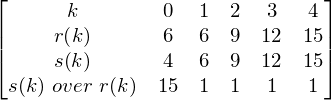

In [29]:
def r(k):
    return 2 + nq*max(0, k + 1 - kOmega0) + np*max(0, k - 1)

def s(k):
    return n + n*max(ord_d_omega_2, k )
kmax = 4
table = sp.zeros(4, kmax+1)
legend = Matrix([sp.S('k'), sp.S('r(k)'), sp.S('s(k)'), sp.Symbol('s(k)~over~r(k)')])


# Ausfüllen der Tabelle
for k in range(kmax+1):
    table[:, k] = k, s(k), r(k), sp.binomial(s(k), r(k))

st.col_stack(legend, table)

Bestimmung von $c^* = \mathrm{coeff}_{\d \ddot\theta_1 \wedge \d \ddot \theta_2 \wedge \d \ddot \theta_3} (\overbrace{\ddot \omega_1  \wedge \ddot \omega_2 \wedge \d F_1}^{\Gamma_2})$

In [30]:
Gamma2 = w1.dot().dot()^w2.dot().dot()^dF

In [31]:
Theta_2 = Gamma2.get_baseform_from_plain_index(-1) ##:
c_star = Gamma2.get_coeff(Theta_2) ##:

Theta_2 := (1)dvarphidddot0^dvarphidddot1^dvarphidddot2

---


---


Es gilt also $c^*=0$. Damit ist die untersuchte hinreichende Bedingung für Nichtflachheitsbedingung **nicht** erfüllt.

---

Warum ist $c^*=0?$

In [32]:
w1_ddot = w1.dot().dot()

Zwar gilt

In [33]:
w1_ddot.ord ##:
dF.ord ##:

___


___


aber für das Produkt gilt

In [34]:
prod = w1_ddot^dF

In [35]:
# Alle Basis-2-Formen mit nur der höchsten Ableitungsordnung

test_form1 = prod.get_baseform_from_plain_index(-1) ##:
test_form2 = prod.get_baseform_from_plain_index(-2) ##:
test_form3 = prod.get_baseform_from_plain_index(-3) ##:

test_form1 := (1)dvarphidddot1^dvarphidddot2

---


test_form2 := (1)dvarphidddot0^dvarphidddot2

---


test_form3 := (1)dvarphidddot0^dvarphidddot1

---


In [36]:
prod.get_coeff(test_form1) ##
prod.get_coeff(test_form2) ##
prod.get_coeff(test_form3) ##

___


___


___


Bemerkung trotz $c^* = 0$ gilt $\Gamma_2\neq 0$, denn es gibt noch viel mehr Koeffizienten.

In [37]:
# Anzahl der Koeffizienten (3-Form über 9 Basis-1-Formen (dphi0 bis dphiddot2))
sp.binomial(9,3) ##:
Gamma2.co

___


(1853)dvarphi0^dvarphi1^dvarphi2  +  (708)dvarphi0^dvarphi1^dvarphidot0  +  (1935)dvarphi0^dvarphi1^dvarphidot1  +  (1690)dvarphi0^dvarphi1^dvarphidot2  +  (1721)dvarphi0^dvarphi1^dvarphiddot0  +  (1754)dvarphi0^dvarphi1^dvarphiddot1  +  (1655)dvarphi0^dvarphi1^dvarphiddot2  +  (684)dvarphi0^dvarphi2^dvarphidot0  +  (1445)dvarphi0^dvarphi2^dvarphidot1  +  (1200)dvarphi0^dvarphi2^dvarphidot2  +  (1231)dvarphi0^dvarphi2^dvarphiddot0  +  (1264)dvarphi0^dvarphi2^dvarphiddot1  +  (1165)dvarphi0^dvarphi2^dvarphiddot2  +  (652)dvarphi0^dvarphidot0^dvarphidot1  +  (644)dvarphi0^dvarphidot0^dvarphidot2  +  (654)dvarphi0^dvarphidot0^dvarphiddot0  +  (652)dvarphi0^dvarphidot0^dvarphiddot1  +  (644)dvarphi0^dvarphidot0^dvarphiddot2  +  (1282)dvarphi0^dvarphidot1^dvarphidot2  +  (1313)dvarphi0^dvarphidot1^dvarphiddot0  +  (1346)dvarphi0^dvarphidot1^dvarphiddot1  +  (1247)dvarphi0^dvarphidot1^dvarphiddot2  +  (1068)dvarphi0^dvarphidot2^dvarphiddot0  +  (1101)dvarphi0^dvarphidot2^dvarphiddot1  +  (10